<a href="https://colab.research.google.com/github/sanket0708/AI_ML_Codes/blob/main/Practice/PredictingAdmissionChances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([40,50,60,70,80,90],dtype=float)
y = np.array([0.30,0.40,0.50,0.65,0.80,0.95],dtype=float)

X_s = x / 100.0

print("X_s : ", X_s)
print("y : ",y)

X_s :  [0.4 0.5 0.6 0.7 0.8 0.9]
y :  [0.3  0.4  0.5  0.65 0.8  0.95]


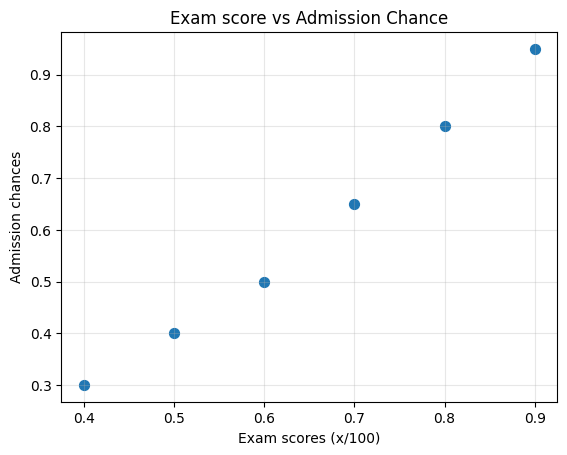

In [12]:
plt.scatter(X_s,y,s=50)
plt.xlabel("Exam scores (x/100)")
plt.ylabel("Admission chances")
plt.title("Exam score vs Admission Chance")
plt.grid(alpha=0.3)
plt.show()

In [14]:
def f_wb(X,w,b):
  return w*X+b


def compute_cost(X,y,w,b):
  m = X.shape[0]
  errors = f_wb(X,w,b) - y
  return (1/(2*m))*np.sum(errors**2)


def compute_gradient(X,y,w,b):
  m = X.shape[0]
  errors = f_wb(X,w,b) - y
  dj_dw = (1/m) * np.dot(errors,X)
  dj_db = (1/m) * np.sum(errors)
  return dj_dw , dj_db

In [17]:
test_w = 0.5
test_b = 0.0
print("Initial cost:", compute_cost(X_s, y, test_w, test_b))
print("Gradient (dj_dw, dj_db):", compute_gradient(X_s, y, test_w, test_b))

Initial cost: 0.04770833333333333
Gradient (dj_dw, dj_db): (np.float64(-0.2025), np.float64(-0.27499999999999997))


In [20]:
import copy, math

def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
  w = copy.deepcopy(w_in)
  b = b_in
  J_history = []
  w_history = []

  for i in range(num_iters):
    dj_dw,dj_db = gradient_function(X,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 100000:
      J_history.append(cost_function(X,y,w,b))
    if i % 100 == 0: # Modified to print every 100 iterations
            w_history.append(w)
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.4f}, w {w:0.6f}, b {b:0.6f}")
  return w, b, J_history, w_history

In [23]:
initial_w = 0.0
initial_b = 0.0
alpha = 0.1  # learning rate
iterations = 1000

w_opt, b_opt, J_hist, w_hist = gradient_descent(X_s, y, initial_w, initial_b,
                                               compute_cost, compute_gradient, alpha, iterations)

print("\nFinal parameters:", "w =", w_opt, "b =", b_opt)


Iteration    0: Cost   0.1550, w 0.042833, b 0.060000
Iteration  100: Cost   0.0105, w 0.476319, b 0.301723
Iteration  200: Cost   0.0071, w 0.630947, b 0.199124
Iteration  300: Cost   0.0048, w 0.757041, b 0.115458
Iteration  400: Cost   0.0033, w 0.859868, b 0.047230
Iteration  500: Cost   0.0022, w 0.943720, b -0.008408
Iteration  600: Cost   0.0016, w 1.012100, b -0.053779
Iteration  700: Cost   0.0011, w 1.067861, b -0.090778
Iteration  800: Cost   0.0008, w 1.113333, b -0.120949
Iteration  900: Cost   0.0006, w 1.150414, b -0.145554

Final parameters: w = 1.1803800797889952 b = -0.16543649081158118


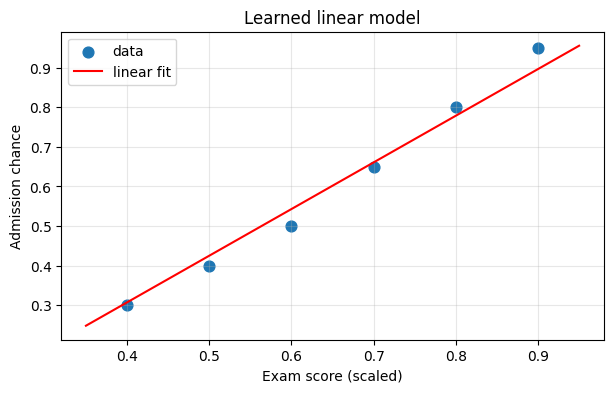

In [24]:
plt.figure(figsize=(7,4))
plt.scatter(X_s, y, s=60, label="data")
x_line = np.linspace(X_s.min()-0.05, X_s.max()+0.05, 100)
y_line = f_wb(x_line, w_opt, b_opt)
plt.plot(x_line, y_line, color='red', label="linear fit")
plt.xlabel("Exam score (scaled)")
plt.ylabel("Admission chance")
plt.title("Learned linear model")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


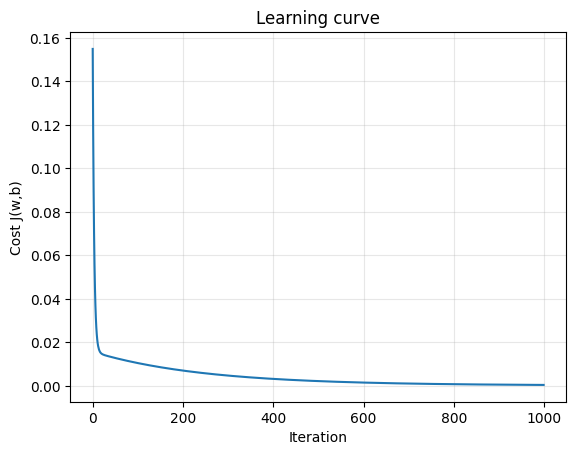

In [26]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Learning curve")
plt.grid(alpha=0.3)
plt.show()


Let's make predictions

In [28]:
score = 87 / 100
print(f"Prediction: {f_wb(score, w_opt, b_opt):0.4f}")

Prediction: 0.8615


In [30]:
def predict(score,w,b):
  score_s = score / 100.0
  return f_wb(score_s,w,b)

for s in [75,55]:
  p = predict(s,w_opt,b_opt)
  print(f"Score {s} -> predicted admission chance = {p:.3f}")

Score 75 -> predicted admission chance = 0.720
Score 55 -> predicted admission chance = 0.484
